<a href="https://colab.research.google.com/github/roapple10/pycaret-demo-aieng/blob/main/Price_Recommendation_System_Modeling_Using_PyCaret_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/price-recommendation-system-modeling-using-pycaret-and-deep-learning-fd05f9f80900
https://www.kaggle.com/code/alcidesgabriel/laptop-exploratory-data-analysis/data

In [ ]:
!pip install pycaret pandas shap

  Using cached numba-0.54.1-cp38-cp38-win_amd64.whl (2.3 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-win_amd64.whl (17.0 MB)


In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
df = pd.read_csv('Export_people_metrics.csv')

In [ ]:
df.head()

,attrition,tenure_bucket,coaching_compliance,lx_completion,planned,reliability,schedule_adherence,timewarp_productivity,unplanned,utt
0,1,0-30 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Over 180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,91-180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Over 180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Over 180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# sample 5% of data to be used as unseen data
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1900, 10)
Unseen Data For Predictions: (100, 10)


In [ ]:
df.dtypes

attrition                  int64
tenure_bucket             object
coaching_compliance      float64
lx_completion            float64
planned                  float64
reliability              float64
schedule_adherence       float64
timewarp_productivity    float64
unplanned                float64
utt                      float64
dtype: object

In [ ]:
df.attrition.value_counts()

1    1000
0    1000
Name: attrition, dtype: int64

In [ ]:
cat_features = ['tenure_bucket']

In [ ]:
experiment = setup(df, target='attrition', categorical_features=cat_features,silent=True)
#experiment = setup(df, target='attrition',ignore_features = ['Name','Ticket','Cabin'], categorical_features=cat_features,silent=True)

,Description,Value
0,session_id,1472
1,Target,attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2000, 10)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9771,0.0000,0.9887,0.9673,0.9778,0.9542,0.9547,0.0050
nb,Naive Bayes,0.9764,0.9816,0.9958,0.9598,0.9773,0.9528,0.9538,0.0030
ada,Ada Boost Classifier,0.9757,0.9791,0.9930,0.9611,0.9766,0.9513,0.9523,0.0200
gbc,Gradient Boosting Classifier,0.9757,0.9827,0.9859,0.9670,0.9763,0.9514,0.9517,0.0170
lightgbm,Light Gradient Boosting Machine,0.9757,0.9827,0.9859,0.9670,0.9763,0.9514,0.9517,0.0210
rf,Random Forest Classifier,0.9736,0.9817,0.9873,0.9619,0.9743,0.9471,0.9476,0.0590
lr,Logistic Regression,0.9735,0.9834,0.9873,0.9618,0.9743,0.9471,0.9476,0.3860
knn,K Neighbors Classifier,0.9735,0.9814,0.9887,0.9606,0.9744,0.9470,0.9477,0.0110
et,Extra Trees Classifier,0.9728,0.9779,0.9873,0.9607,0.9737,0.9456,0.9463,0.0410
dt,Decision Tree Classifier,0.9721,0.9738,0.9873,0.9593,0.9730,0.9442,0.9449,0.0030


In [ ]:
#viewing results from the bottom
predict_model(best_model, df.tail())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


,attrition,tenure_bucket,coaching_compliance,lx_completion,planned,reliability,schedule_adherence,timewarp_productivity,unplanned,utt,Label
1995,0,Over 180 Days,0.0,0.0,0.0,0.992593,0.925690,0.991724,0.007407,0.008276,0
1996,0,Over 180 Days,0.0,0.0,0.0,1.000000,0.000000,0.961333,0.000000,0.038667,0
1997,0,91-180 Days,0.0,0.0,0.0,0.000000,0.000000,1.020053,0.000000,0.000000,0
1998,0,91-180 Days,0.0,0.0,0.0,1.000000,0.997407,0.000000,0.000000,0.000000,0
1999,0,31-60 Days,0.0,0.0,0.0,1.000000,0.872847,1.001333,0.000000,0.000000,0


In [ ]:

#save_model(best_model, model_name='ridge-model')
# model = load_model('ridge-model')

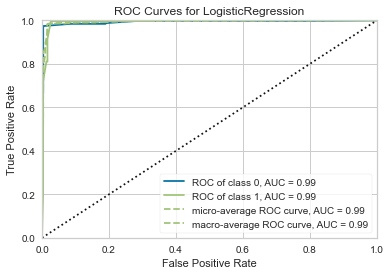

In [ ]:
lr = create_model('lr')
# plotting a model
plot_model(lr)

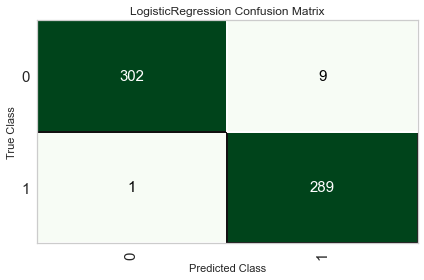

In [ ]:
plot_model(lr, plot = 'confusion_matrix')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9929,0.9995,1.0000,0.9859,0.9929,0.9857,0.9858
1,0.9857,0.9969,0.9857,0.9857,0.9857,0.9714,0.9714
2,0.9643,0.9693,0.9857,0.9452,0.9650,0.9286,0.9294
3,0.9857,0.9820,0.9857,0.9857,0.9857,0.9714,0.9714
4,0.9786,0.9867,0.9714,0.9855,0.9784,0.9571,0.9572
5,0.9714,0.9847,0.9857,0.9583,0.9718,0.9429,0.9432
6,0.9786,0.9729,1.0000,0.9595,0.9793,0.9571,0.9580
7,0.9857,0.9710,1.0000,0.9726,0.9861,0.9714,0.9718
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


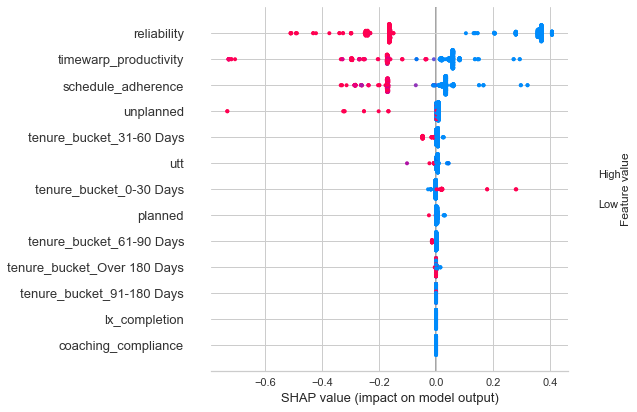

In [ ]:
dt = create_model('dt')
interpret_model(dt)

In [ ]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.0000,0.9859,0.9722,0.9790,0.9571,0.9572
1,0.9857,0.0000,1.0000,0.9726,0.9861,0.9714,0.9718
2,0.9714,0.0000,0.9718,0.9718,0.9718,0.9428,0.9428
3,0.9929,0.0000,0.9859,1.0000,0.9929,0.9857,0.9858
4,0.9643,0.0000,0.9718,0.9583,0.9650,0.9285,0.9286
5,0.9929,0.0000,1.0000,0.9861,0.9930,0.9857,0.9858
6,0.9786,0.0000,1.0000,0.9595,0.9793,0.9571,0.9580
7,0.9714,0.0000,0.9859,0.9589,0.9722,0.9428,0.9432
8,0.9643,0.0000,1.0000,0.9342,0.9660,0.9285,0.9309


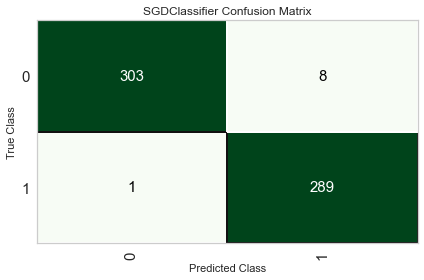

In [ ]:
plot_model(svm, plot = 'confusion_matrix')

https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d

When a model is created using the create_model function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model function is used. This function automatically tunes the hyperparameters of a model using random grid search on a pre-defined search space. The output prints a scoring grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass custom_grid parameter in the tune_model function (see 11.2 KNN tuning below).

In [ ]:
tuned_dt = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.0000,0.9859,0.9589,0.9722,0.9428,0.9432
1,0.9786,0.0000,0.9859,0.9722,0.9790,0.9571,0.9572
2,0.9714,0.0000,0.9718,0.9718,0.9718,0.9428,0.9428
3,0.9929,0.0000,0.9859,1.0000,0.9929,0.9857,0.9858
4,0.9643,0.0000,0.9718,0.9583,0.9650,0.9285,0.9286
5,0.9929,0.0000,1.0000,0.9861,0.9930,0.9857,0.9858
6,0.9786,0.0000,1.0000,0.9595,0.9793,0.9571,0.9580
7,0.9714,0.0000,0.9859,0.9589,0.9722,0.9428,0.9432
8,0.9714,0.0000,0.9859,0.9589,0.9722,0.9428,0.9432


In [ ]:
print(tuned_dt)

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.6400000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=6547, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


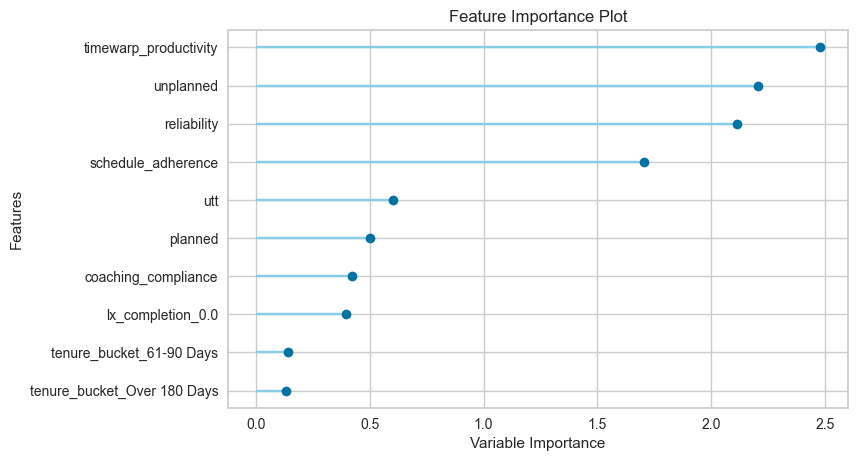

In [ ]:
plot_model(tuned_dt, plot='feature')

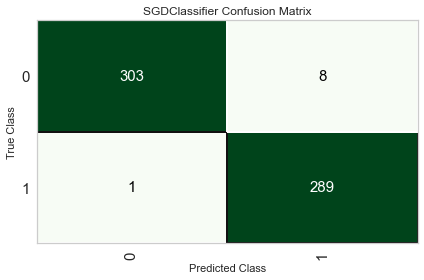

In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9850,0.9854,0.9966,0.9731,0.9847,0.9700,0.9703


In [ ]:
# finalize rf model
final = finalize_model(tuned_dt)
# print final model parameters
print(final)

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.6400000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=6547, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
predict_model(final);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9850,0.9854,0.9966,0.9731,0.9847,0.9700,0.9703


#### The predict_model function is also used to predict on the unseen dataset. The only difference from section  above is that this time we will pass the data_unseen. It is the variable created at the beginning of this tutorial and contains 5%  of the original dataset which was never exposed to PyCaret. 

In [ ]:
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9800,0.9795,0.9828,0.9828,0.9828,0.9589,0.9589


,attrition,tenure_bucket,coaching_compliance,lx_completion,planned,reliability,schedule_adherence,timewarp_productivity,unplanned,utt,Label
0,1,31-60 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,Over 180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,Over 180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,61-90 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,Over 180 Days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# check metric on unseen data
from pycaret.utils import check_metric
check_metric(unseen_predictions['attrition'], unseen_predictions['Label'], metric = 'Accuracy')


0.98